**Question 8 -**

Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations

2. Write code comments wherever required for code understanding

**Insights to be drawn -**

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

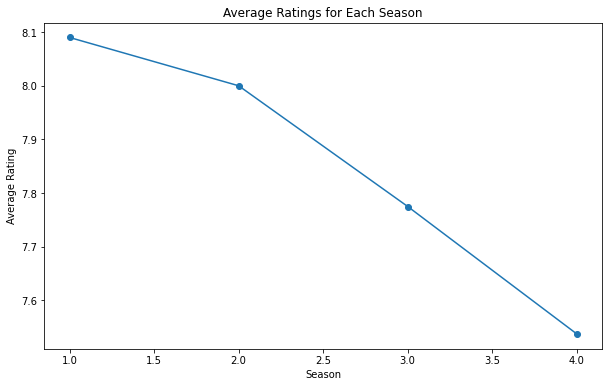

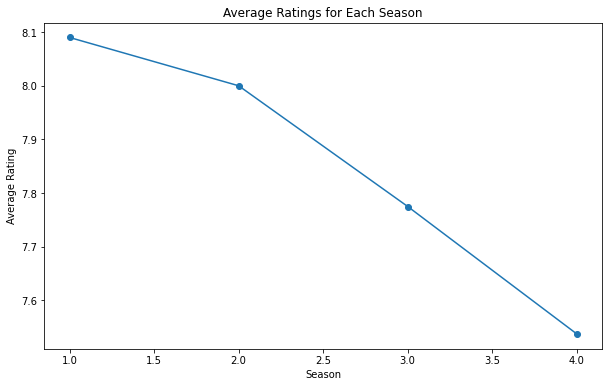

Season 1 - High Rated Episodes:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 - High Rated Episodes:
Kiksuya
Vanishing Point
The Passenger

Episodes Aired Before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger

Season 1 - Highest Rated Episode: The Bicameral Mind
Season 1 - Lowest Rated Episode: The Stray

Season 2 - Highest Rated Episode: Kiksuya
Season 2 - Lowest Rated Episode: Akane No Mai

Season 3 - Highest Rated Episode: Parce Domine
Season 3 - Lowest Rated Episode: Decoherence

Season 4 - Highest Rated Episode: Zhuangzi
Season 4 - Lowest Rated Episode: The Auguries

Season 1 - Most Popular Episode Summary:
<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to

In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to download data from the API
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Function to analyze the data and generate insights
def analyze_data(data):
    # Get overall ratings for each season
    season_ratings = {}
    episode_ratings = {}

    for episode in data["_embedded"]["episodes"]:
        season_number = episode["season"]
        episode_name = episode["name"]
        episode_rating = episode["rating"]["average"]

        if season_number not in season_ratings:
            season_ratings[season_number] = []

        season_ratings[season_number].append(episode_rating)
        episode_ratings[episode_name] = episode_rating

    # Generate plot for ratings of each season
    seasons = list(season_ratings.keys())
    ratings = [sum(season_ratings[season]) / len(season_ratings[season]) for season in seasons]

    plt.figure(figsize=(10, 6))
    plt.plot(seasons, ratings, marker='o')
    plt.xlabel("Season")
    plt.ylabel("Average Rating")
    plt.title("Average Ratings for Each Season")
    plt.show()

    # Get episode names with average rating > 8 for each season
    high_rated_episodes = {}
    for season in data["_embedded"]["episodes"]:
        season_number = season["season"]
        episode_name = season["name"]
        episode_rating = season["rating"]["average"]

        if episode_rating > 8:
            if season_number not in high_rated_episodes:
                high_rated_episodes[season_number] = []

            high_rated_episodes[season_number].append(episode_name)

    # Get episode names aired before May 2019
    episodes_before_may_2019 = []
    for episode in data["_embedded"]["episodes"]:
        episode_name = episode["name"]
        episode_airdate = episode["airdate"]

        if episode_airdate < "2019-05-01":
            episodes_before_may_2019.append(episode_name)

    # Get the episode name with the highest and lowest rating for each season
    highest_rated_episodes = {}
    lowest_rated_episodes = {}
    for season in season_ratings:
        episodes = data["_embedded"]["episodes"]
        season_episodes = [episode for episode in episodes if episode["season"] == season]

        highest_rated_episode = max(season_episodes, key=lambda episode: episode["rating"]["average"])
        lowest_rated_episode = min(season_episodes, key=lambda episode: episode["rating"]["average"])

        highest_rated_episodes[season] = highest_rated_episode["name"]
        lowest_rated_episodes[season] = lowest_rated_episode["name"]

    # Get the summary for the most popular (highest-rated) episode in each season
    most_popular_episodes_summary = {}
    for season in season_ratings:
        episodes = data["_embedded"]["episodes"]
        season_episodes = [episode for episode in episodes if episode["season"] == season]

        most_popular_episode = max(season_episodes, key=lambda episode: episode["rating"]["average"])
        most_popular_episodes_summary[season] = most_popular_episode["summary"]

    return {
        "season_ratings": season_ratings,
        "high_rated_episodes": high_rated_episodes,
        "episodes_before_may_2019": episodes_before_may_2019,
        "highest_rated_episodes": highest_rated_episodes,
        "lowest_rated_episodes": lowest_rated_episodes,
        "most_popular_episodes_summary": most_popular_episodes_summary,
    }

# Main program
def main():
    url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
    data = download_data(url)
    if data:
        insights = analyze_data(data)

        # Display the insights

        # Plot average ratings for each season
        season_ratings = insights["season_ratings"]
        seasons = list(season_ratings.keys())
        ratings = [sum(season_ratings[season]) / len(season_ratings[season]) for season in seasons]

        plt.figure(figsize=(10, 6))
        plt.plot(seasons, ratings, marker='o')
        plt.xlabel("Season")
        plt.ylabel("Average Rating")
        plt.title("Average Ratings for Each Season")
        plt.show()

        # Print episode names with average rating > 8 for each season
        high_rated_episodes = insights["high_rated_episodes"]
        for season in high_rated_episodes:
            print(f"Season {season} - High Rated Episodes:")
            for episode in high_rated_episodes[season]:
                print(episode)
            print()

        # Print episode names aired before May 2019
        episodes_before_may_2019 = insights["episodes_before_may_2019"]
        print("Episodes Aired Before May 2019:")
        for episode in episodes_before_may_2019:
            print(episode)
        print()

        # Print highest and lowest rated episodes for each season
        highest_rated_episodes = insights["highest_rated_episodes"]
        lowest_rated_episodes = insights["lowest_rated_episodes"]
        for season in highest_rated_episodes:
            print(f"Season {season} - Highest Rated Episode: {highest_rated_episodes[season]}")
            print(f"Season {season} - Lowest Rated Episode: {lowest_rated_episodes[season]}")
            print()

        # Print summary for the most popular (highest-rated) episode in each season
        most_popular_episodes_summary = insights["most_popular_episodes_summary"]
        for season in most_popular_episodes_summary:
            print(f"Season {season} - Most Popular Episode Summary:")
            print(most_popular_episodes_summary[season])
            print()
    else:
        print("Failed to download data from the provided API link.")

if __name__ == "__main__":
    main()

